In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
m = 100 # creating 100 samples
x = np.linspace(0,10,m).reshape(m,1)
y = x+np.random.randn(m,1)

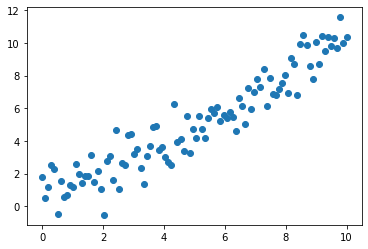

In [3]:
plt.scatter(x,y)

Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [5]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)


0.8881140743377214

c'est le R² de la méthode des MC qui est calculé ici

on peut faire un graphique

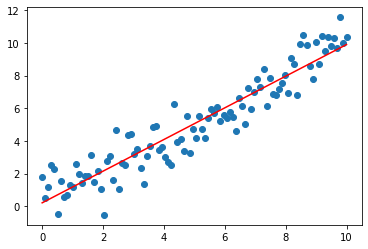

In [6]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)
predictions = model.predict(x)

plt.scatter(x,y)
plt.plot(x, predictions, c='r')

si le model n'est pas lineaire, on choisit un autre model par exemple y = x²+np.random.randn(m,1)

In [7]:
np.random.seed(0)
m = 100 # creating 100 samples
x = np.linspace(0,10,m).reshape(m,1)
y = x**2+np.random.randn(m,1)

c:\users\administrateur\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


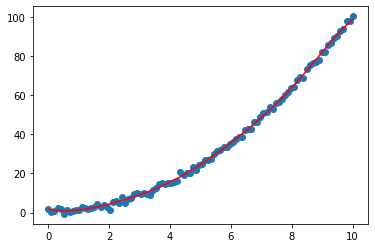

In [8]:
model1 = SVR(C=100)
model1.fit(x,y)
model1.score(x,y)
predictions = model1.predict(x)

plt.scatter(x,y)
plt.plot(x, predictions, c='r')

Classification KNN

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [10]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
titanic = titanic.drop(['sibsp', 'parch', 'fare','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], axis=1)
titanic = titanic.dropna(axis=0)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
titanic.head()


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [13]:
titanic.shape

(714, 4)

In [14]:
y = titanic['survived']
x = titanic.drop(['survived'], axis = 1)

In [15]:
y.shape

(714,)

from sklearn.neighbors import KNeighborsClassifier

In [16]:
model2 = KNeighborsClassifier(n_neighbors=5) # si n_neighbors augmente la précision du modele diminue et vis et versa

ValueError: x and y must be the same size

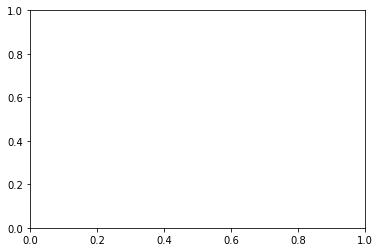

In [20]:
model2.fit(x,y)
model2.score(x,y)
model2.predict(x)
predictions = model2.predict(x)
#print(predictions)
plt.scatter(x,y)
#plt.plot(x, predictions, c='r')


ie dans 83.19 % des cas, le model effectue une bonne prédiction

In [ ]:
def survie(model2, pclass=2, sex=0, age=62):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model2.predict(x))
    print(model2.predict_proba(x))

In [ ]:
survie(model2)

donc il ya 80 % de chance d'appartenir à la classe 0 (ie DC) et  20 % d'appartenir à la classe 1 (ie en vie)